# Multiple Subplots

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## `plt.axes`: Subplots by Hand

`plt.axes` takes optional argument: `[left, bottom, width, height]`

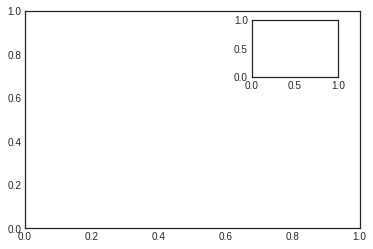

In [6]:
ax1 = plt.axes()
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

The equivalent within the object-oriented interface is `fig.add_axes()`

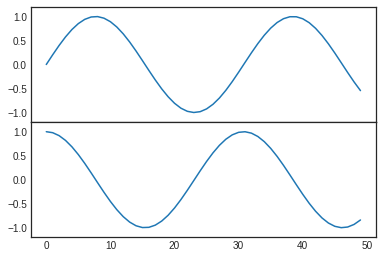

In [7]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

## `plt.subplot`: Simple Grids of Subplots

Aligned columns or rows of subplots are common, so Matplotlib added the `plt.subplot` to do so easily. We pass the number of rows and columns of the grid, and the index of the plot we want to display

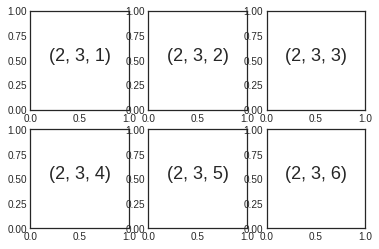

In [8]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

`plt.subplots_adjust` can be used to adjust the spacing between plots.


The equivalent of `plt.subplot` within the object-oriented interface is `fig.add_subplot()`

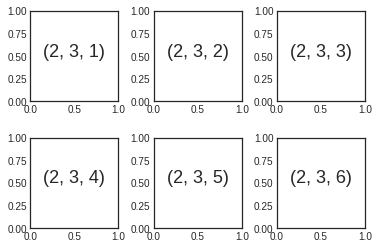

In [9]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4) # 40% of plot width / height
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

## `plt.subplots`: The Whole Grid in One Go

`plt.subplots` create all the plots in one line, and return them as a numpy array. `sharex` and `sharey` allow us to specify the relationships between different axes

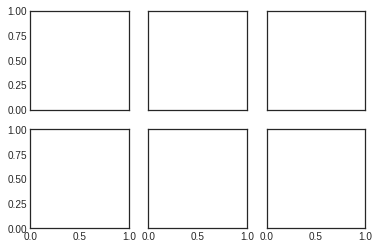

In [12]:
fig, ax = plt.subplots(2, 3, sharex="col", sharey="row")

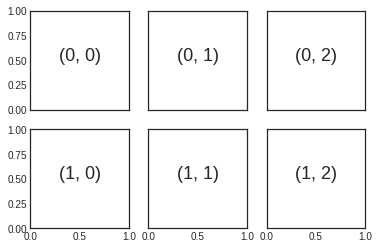

In [13]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

## `plt.GridSpec`: More Complicated Arrangements

To go beyond a regular grid, `plt.GridSpec` is the best tool. It does not create a subplot, it is simply a convenient interface recognized by the `plt.subplot` command.

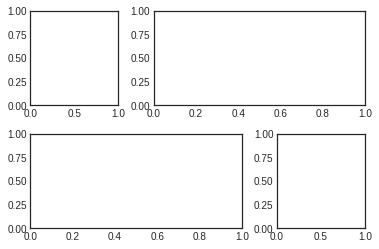

In [15]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

Example

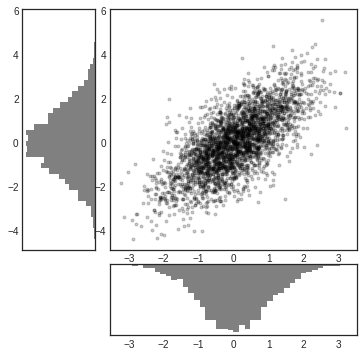

In [30]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()